# Objective Analysis HW1: Data distributions and probability density functions

In [ ]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

In [ ]:
range(5, 61, 5)

range(5, 61, 5)

## Problem 1

Christman Field is at 40.6/-105.1

In [ ]:
y1 = pd.read_csv('/content/drive/MyDrive/Classes/OA/HW1/homework_1_data_Y1.csv')
y2 = pd.read_csv('/content/drive/MyDrive/Classes/OA/HW1/homework_1_data_Y2.csv')

In [ ]:
y3 = xr.open_dataset('/content/drive/MyDrive/Classes/OA/HW1/surface_pres.nc').sel(latitude=40.6, longitude=-105.1, method='nearest').to_dataframe()
y3.reset_index(inplace=True)
y3.drop(['number', 'latitude', 'longitude', 'expver', 'valid_time'], inplace=True, axis=1)

In [ ]:
# standardize the time series
y1s = (y1 - y1.mean())/y1.std()
y2s = (y2 - y2.mean())/y2.std()
y3s = (y3 - y3.mean())/y3.std()

In [ ]:
# get the histograms
xinc = 0.2
y1s_bins = np.arange(y1s.min().values[0], y1s.max().values[0], xinc)
y2s_bins = np.arange(y2s.min().values[0], y2s.max().values[0], xinc)
y3s_bins = np.arange(y3s.min().values[0], y3s.max().values[0], xinc)
h1 = np.histogram(y1s, y1s_bins)
h2 = np.histogram(y2s, y2s_bins)
h3 = np.histogram(y3s, y3s_bins)

In [ ]:
f1 = h1[0].astype(float)/(np.size(y1s)*xinc)
f2 = h2[0].astype(float)/(np.size(y2s)*xinc)
f3 = h3[0].astype(float)/(np.size(y3s)*xinc)

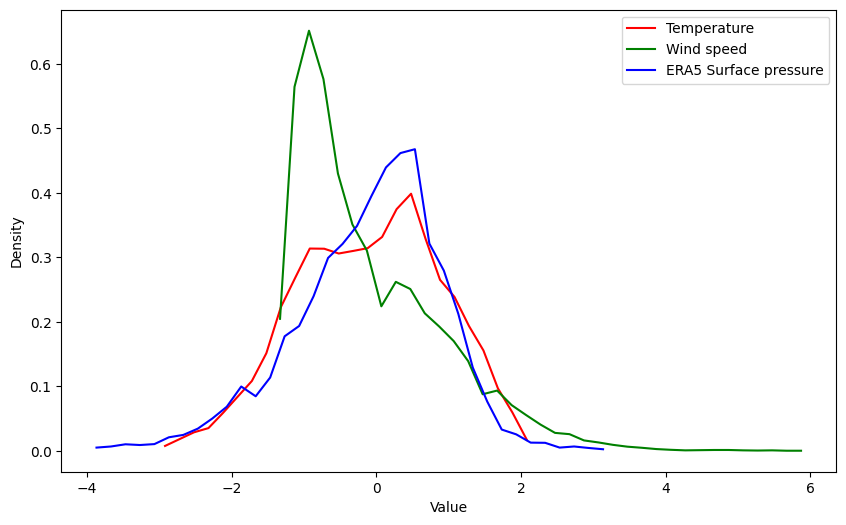

In [ ]:
# plot pdf estimate
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(h1[1][:-1], f1, 'r', label = 'Temperature')
ax.plot(h2[1][:-1], f2, 'g', label = 'Wind speed')
ax.plot(h3[1][:-1], f3, 'b', label = 'ERA5 Surface pressure')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend();
plt.savefig('fig1.png')

In [ ]:
[np.sum(f1*xinc), np.sum(f2*xinc), np.sum(f3*xinc)]

[0.9996575146983275, 0.9999429191163879, 0.9997716894977169]

In [ ]:
z = np.random.normal(0, 1, 100000)
z_bins = np.arange(z.min(), z.max(), xinc)
h4 = np.histogram(z, z_bins)
f4 = h4[0].astype(float)/(np.size(z)*xinc)

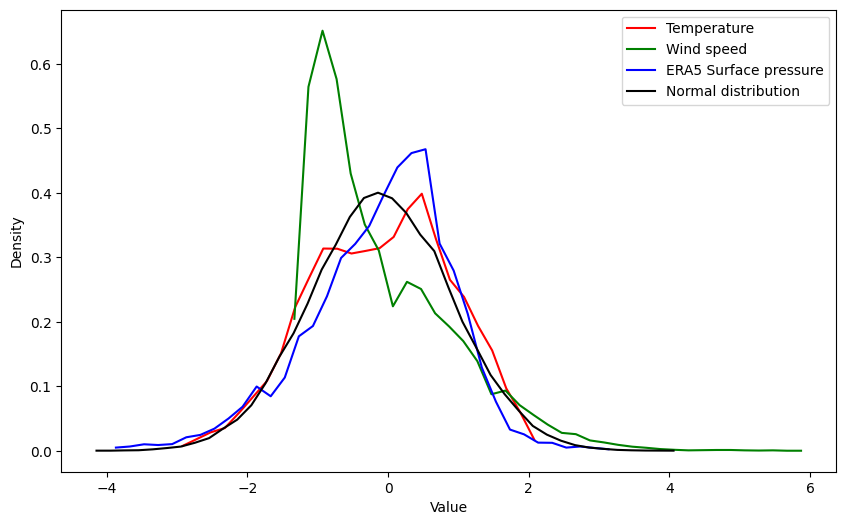

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(h1[1][:-1], f1, 'r', label = 'Temperature')
ax.plot(h2[1][:-1], f2, 'g', label = 'Wind speed')
ax.plot(h3[1][:-1], f3, 'b', label = 'ERA5 Surface pressure')
ax.plot(h4[1][:-1], f4, 'k', label = 'Normal distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend();
plt.savefig('fig2.png')

<Axes: >

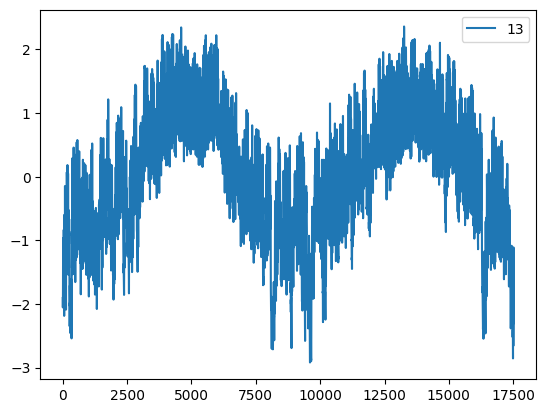

In [ ]:
y1s.plot()

* ERA5 surface pressure looks somewhat normal but has excess kurtosis and a slight negative skew. Air temperature might be normal if there were more points plotted. Wind speed is decidedly NOT normal.

**Pr(x>=2sigma)=?**
* Since they're standardized, they all have mean of 0 and std of 1

In [ ]:
np.squeeze(y1s.values)

array([-1.90680238, -1.96088866, -2.0248088 , ..., -2.11823054,
       -2.27557243, -2.3001571 ])

In [ ]:
stats.gaussian_kde(np.squeeze(z)).integrate_box_1d(2, 5)*100

2.3257667039016727

In [ ]:
[len(np.where(y1s>=2)[0])/len(y1s)*100, len(np.where(y2s>=2)[0])/len(y2s)*100, len(np.where(y3s>=2)[0])/len(y3s)*100,len(np.where(z>=2)[0])/len(z)*100]

[0.6906786917061476, 4.760545693247331, 1.1358447488584476, 2.26]

In [ ]:
len(y1s[y1s>=2])/len(y1s)

1.0

**What phy value does +2s correspond to?**

In [ ]:
x1 = y1.mean() + 2*y1.std()
x2 = y2.mean() + 2*y2.std()
x3 = y3.mean() + 2*y3.std()
x4 = z.mean() + 2*z.std()

In [ ]:
[x1, x2, x3, x4]

[13    90.256067
 dtype: float64,
 1.3    8.092567
 dtype: float64,
 sp    85071.46875
 dtype: float32,
 1.9993229495380143]

**Imagine you go out today and measure the wind speed (Y2) and you obtain a standardized value of +3
standard deviations. How rare of an event is this (how often does a value of +3 or more occur)? How
rare would you think this event was if you erroneously assumed that wind speed followed a normal
distribution?**

In [ ]:
# actual
y3s_plus3s = len(np.where(y2s>=3)[0])/len(y2s)
print('Actual ' + str(y3s_plus3s*100))

# assumed normal distribution
print('Normal ' + str((1 - stats.norm.cdf(3))*100))

Actual 0.9190022261544608
Normal 0.13498980316301035


**Provide a few sentences about your data (Y3) and what you have learned about its distribution and
what this may tell you about the processes at play.**

In [ ]:
y3.mean()/y3.std()

,0
sp,154.741379


In [ ]:
y3.std()

,0
sp,542.750549


My surface pressuere data is approximately normal since the values cluster around the mean. If I wanted to estimate the probability of exceeding +2s or +3s, assuming a normal distribution would be a close overestimate. The excess kurtosis indicates that surface pressure is more clustered around the mean than a normal distribution and that rare events (at the tails) are even less likely to occur. Physically, this tells me that surface pressure is pretty consistent.

## Problem 2

**Plot estimates of the probability density functions of the sample means for the four time series for
N= 20.**

In [ ]:
def get_sample_means(N, experiments=10000):
  y1s_sample_means = np.zeros(experiments)
  y2s_sample_means = np.zeros(experiments)
  y3s_sample_means = np.zeros(experiments)
  z_sample_means = np.zeros(experiments)

  for i in range(experiments):
    y1s_sample_means[i] = np.random.choice(np.squeeze(y1s.values), N, replace=True).mean()
    y2s_sample_means[i] = np.random.choice(np.squeeze(y2s.values), N, replace=True).mean()
    y3s_sample_means[i] = np.random.choice(np.squeeze(y3s.values), N, replace=True).mean()
    z_sample_means[i] = np.random.choice(z, N, replace=True).mean()

  return y1s_sample_means, y2s_sample_means, y3s_sample_means, z_sample_means

In [ ]:
y1s_sms, y2s_sms, y3s_sms, z_sms = get_sample_means(20)

In [ ]:
# get the histograms
xinc = 0.2
bins1 = np.arange(y1s_sms.min(), y1s_sms.max(), xinc)
bins2 = np.arange(y2s_sms.min(), y2s_sms.max(), xinc)
bins3 = np.arange(y3s_sms.min(), y3s_sms.max(), xinc)
bins4 = np.arange(z_sms.min(), z_sms.max(), xinc)
h1 = np.histogram(y1s_sms, bins1)
h2 = np.histogram(y2s_sms, bins2)
h3 = np.histogram(y3s_sms, bins3)
h4 = np.histogram(z_sms, bins4)

In [ ]:
# continuous funcs for plotting
f1 = h1[0].astype(float)/(np.size(y1s_sms)*xinc)
f2 = h2[0].astype(float)/(np.size(y2s_sms)*xinc)
f3 = h3[0].astype(float)/(np.size(y3s_sms)*xinc)
f4 = h4[0].astype(float)/(np.size(z_sms)*xinc)

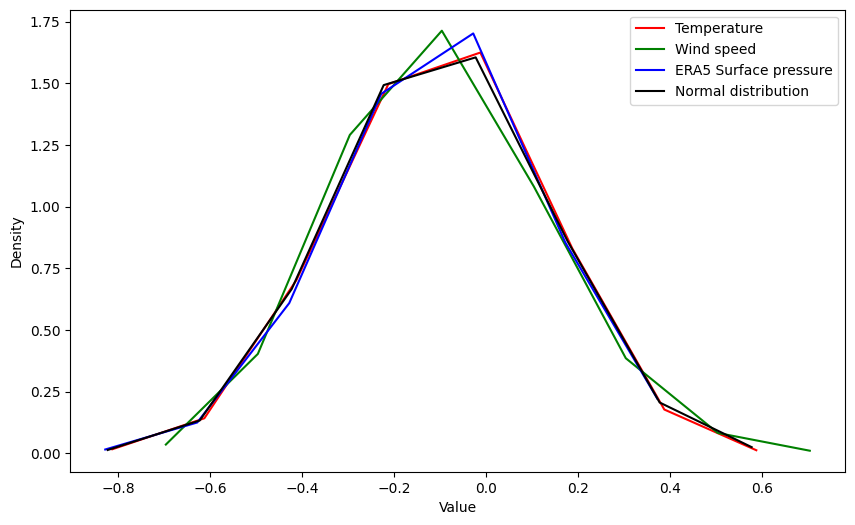

In [ ]:
# plot pdf estimate
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(h1[1][:-1], f1, 'r', label = 'Temperature')
ax.plot(h2[1][:-1], f2, 'g', label = 'Wind speed')
ax.plot(h3[1][:-1], f3, 'b', label = 'ERA5 Surface pressure')
ax.plot(h4[1][:-1], f4, 'k', label = 'Normal distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend();
plt.savefig('fig3.png')

In [ ]:
# check that they are pdfs
[np.sum(f1*xinc), np.sum(f2*xinc), np.sum(f3*xinc), np.sum(f4*xinc)]

[0.9997999999999999, 0.9999, 0.9967000000000001, 0.9995]

**Plot the frequency of the sample mean being ⩽−0.35 as a function of N for the four time series.**

In [ ]:
# get frequency by N
Ns = np.arange(5, 65, 5)
freq1, freq2, freq3, freq4 = [], [], [], []
for n in Ns:
  y1s_sms, y2s_sms, y3s_sms, z_sms = get_sample_means(n)
  freq1.append(len(np.where(y1s_sms <= -0.35)[0])/len(y1s_sms))
  freq2.append(len(np.where(y2s_sms <= -0.35)[0])/len(y2s_sms))
  freq3.append(len(np.where(y3s_sms <= -0.35)[0])/len(y3s_sms))
  freq4.append(len(np.where(z_sms <= -0.35)[0])/len(z_sms))

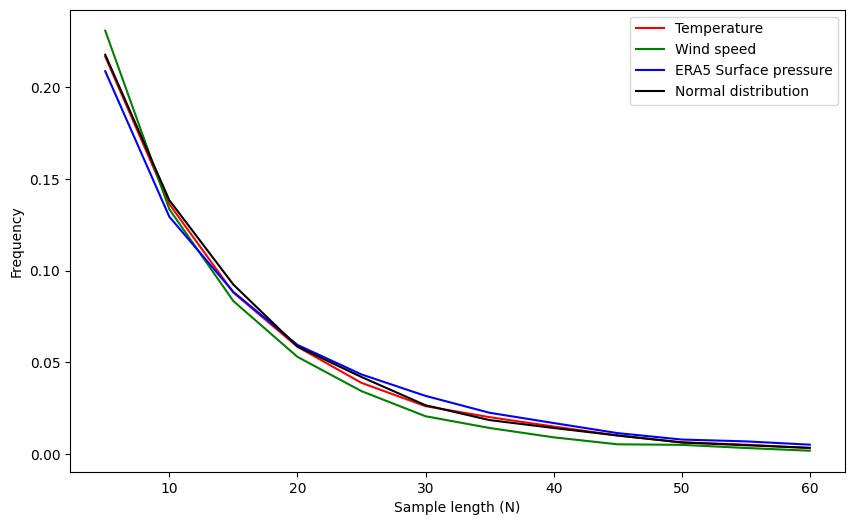

In [ ]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(Ns, freq1, 'r', label = 'Temperature')
ax.plot(Ns, freq2, 'g', label = 'Wind speed')
ax.plot(Ns, freq3, 'b', label = 'ERA5 Surface pressure')
ax.plot(Ns, freq4, 'k', label = 'Normal distribution')
plt.xlabel('Sample length (N)')
plt.ylabel('Frequency')
plt.legend();
plt.savefig('fig4.png')

**Do the approximate probability density functions of the different time series look the same? Different?
Why?**

The probability density functions of the different time series look very similar. This is due to the central limit theorem: the distribution of the sample mean will be normal with a sufficient sample length, regardless of the underlying distribution.

**What has this exercise shown you about assuming gaussian statistics for sample means?**

This exercise has demonstrated that gaussian statistics work great for sample means with a sufficient number of resamples. It is also clear that as N grows, the sample mean approaches the actual mean and the probability of the sample mean being above or below that actual mean approaches zero.

## Problem 3

In [ ]:
pic = xr.open_dataset('/content/drive/MyDrive/Classes/OA/HW1/TS_timeseries_cesmle_1850.nc')
forced = xr.open_dataset('/content/drive/MyDrive/Classes/OA/HW1/TS_timeseries_cesmle_1920_2100.nc')

In [ ]:
# view dataset
# forced
# pic

**Use the 1850 control run to calculate population statistics (e.g. mean and variance) in the absence of
climate change. Plot a histogram of the data. Do you think that this distribution is Gaussian?**

In [ ]:
pic_ar = pic.gts_annual.values

In [ ]:
[pic_ar.mean(), pic_ar.std()]

[287.10522, 0.103609964]

In [ ]:
# get control histo
xinc = 0.2
bins = np.arange(pic_ar.min(), pic_ar.max(), xinc*pic_ar.std())
pic_histo = np.histogram(pic_ar, bins)

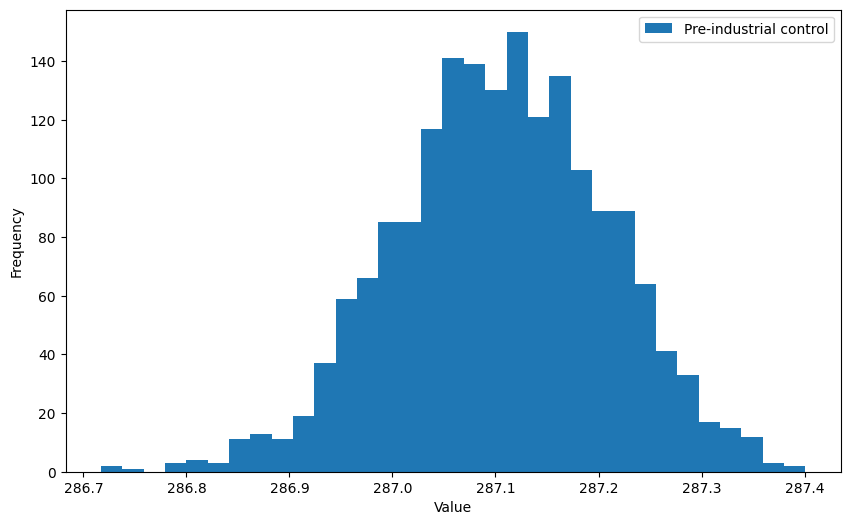

In [ ]:
# plot histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.hist(pic_ar, bins, label='Pre-industrial control')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend();
plt.savefig('fig5.png')

The distribution is approximately gaussian with a slight negative skew.

**Plot the time series from the control data as well as a time series of the global mean temperature from
the first ensemble member.**

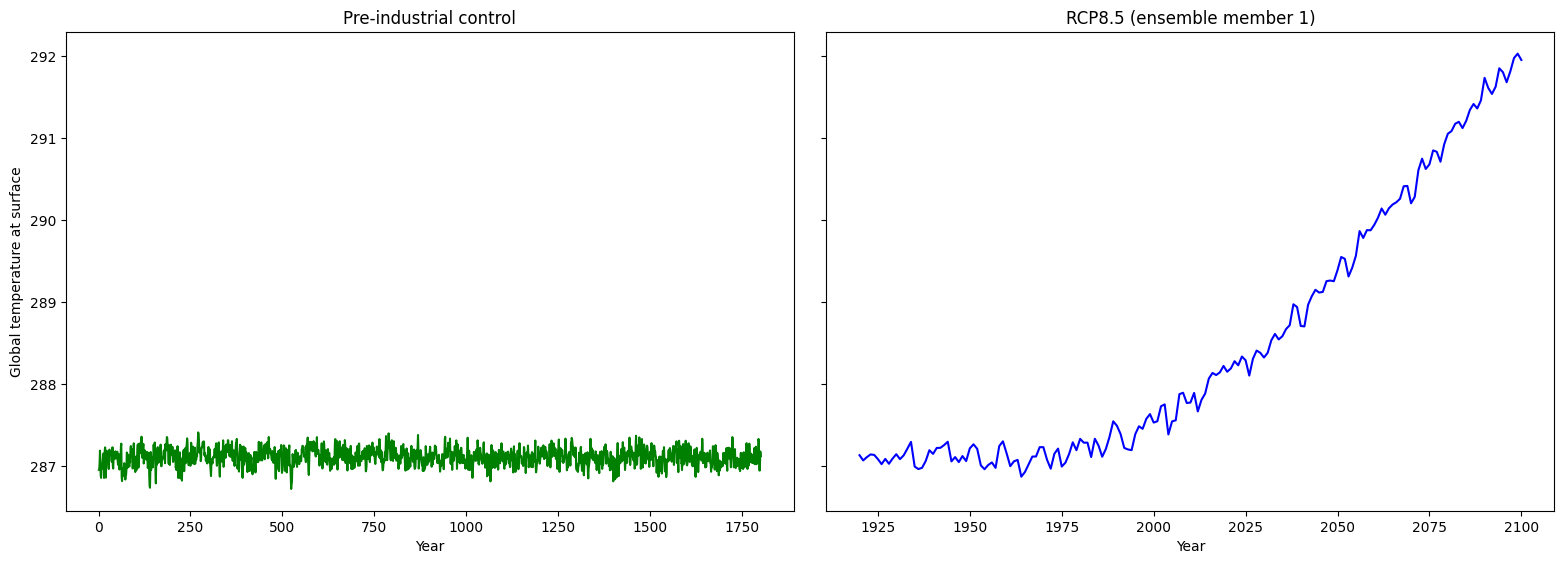

In [ ]:
# plot pdf estimate
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
pic.gts_annual.plot(ax=ax[0], c='g')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Global temperature at surface')
ax[0].set_title('Pre-industrial control')

forced.gts_ann_allcesmle.sel(member=1).plot(ax=ax[1], c='b', label = 'Forced')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('')
ax[1].set_title('RCP8.5 (ensemble member 1)')
plt.tight_layout(pad=2.0);
plt.savefig('fig6.png')

**Estimate present-day global warming in the first ensemble member by calculating the global mean
temperature over 1980-2019 (40 years).**

In [ ]:
forced.gts_ann_allcesmle.sel(member=1).sel(year=slice(1980, 2019)).mean()

<xarray.DataArray 'gts_ann_allcesmle' ()> Size: 8B
array(287.57489014)
Coordinates:
    member   int32 4B 1

**Under the assumption that there is no global warming, that is, the 1850 control run and the climate
change simulations are drawn from the same climate, how odd is a 40-year mean temperature as the
one you calculated in the step above?**

In [ ]:
ind = 1
end = 1801 - 40
means = []
while ind <= end:
  sample = pic_ar[ind:ind+40]
  means.append(pic_ar[ind:ind+40].mean())
  ind += 40

means = np.array(means)

In [ ]:
pic_ar.std()/np.sqrt(40)

0.016382173766171026

In [ ]:
means.std()

0.03346938

In [ ]:
means.max()

287.1798

In [ ]:
z_val = (287.57489014-means.mean())/(means.std())

In [ ]:
z_val

14.029046103276084

In [ ]:
len(np.where(np.array(means) >= 287.57489014)[0])/len(means)

0.0

**Perform the same calculation in part 3 but now for the other 39
ensemble members. How much more confident are you that your null hypothesis that global warming
is not real (i.e. all simulations are drawn from a control, unforced climate) can be rejected? Why? Try
and be as quantitative as possible.**

In [ ]:
gmts = []
for m in forced.member.values:
  gmts.append(forced.gts_ann_allcesmle.sel(member=m).sel(year=slice(1980, 2019)).mean())

In [ ]:
gmts = np.array(gmts)

In [ ]:
gmts.min()

287.50726318359375

Based on the 40 RCP8.5 ensemble members and the 45 pre-industrial control samples, it would be impossible to achieve the RCP8.5 forced global mean temperature under pre-industrial conditions. Since the RCP-8.5 conditions are a proxy for actual warming, we can reject the null hypothesis that global warming is not real.